In [12]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import wavio

In [3]:
df = pd.read_csv("./data/train.csv")
example_id = df['example_id']
x = df['x']
y = df['TARGET']

In [4]:
df.head(10)

,example_id,x,TARGET
0,0,0.000,0.800000
1,1,0.001,0.800000
2,2,0.002,0.800000
3,3,0.003,0.799999
4,4,0.004,0.799998
5,5,0.005,0.799998
6,6,0.006,0.799996
7,7,0.007,0.799995
8,8,0.008,0.799994
9,9,0.009,0.799992


In [5]:
x.head(5)

0    0.000
1    0.001
2    0.002
3    0.003
4    0.004
Name: x, dtype: float64

error:0.7294054063652545 period:2.2211682639525403 amplitude:0.6861237985512014 constant: 0.9085734682955074 
error:0.599260548278668 period:1.675768755300906 amplitude:0.6863804454781248 constant: 0.9083155221363958 
error:0.5920388659649034 period:4.002363018323461 amplitude:0.6861630216364643 constant: 0.9082858814801456 
error:0.5589239939870958 period:2.697453954392936 amplitude:0.6856287102903987 constant: 0.9082253246527248 
error:0.6048931453852675 period:1.624370242003027 amplitude:0.6860774893700388 constant: 0.9081064330495304 
error:0.5375363842499371 period:3.018628673330964 amplitude:0.6858393425532443 constant: 0.908052637862636 
error:0.5557043946013452 period:3.5174781535257917 amplitude:0.6859034366171177 constant: 0.907897638210131 
error:0.571574053797386 period:5.232733252272475 amplitude:0.6862296438502631 constant: 0.9081436562959703 
error:0.5740069171242816 period:5.464977182776858 amplitude:0.686246720993776 constant: 0.9081693744448558 
error:0.55365319918838

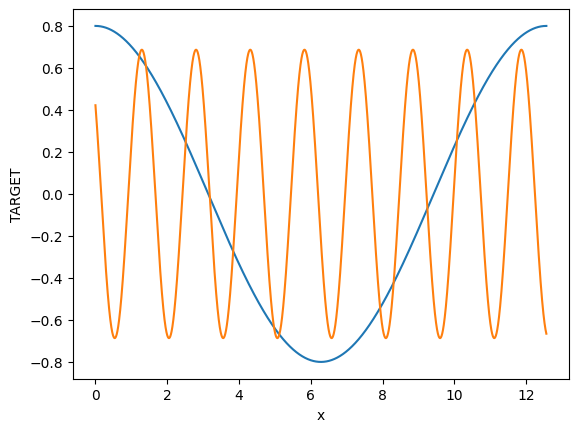

error:0.5649760724602705 period:3.375852575902133 amplitude:0.6867637919259318 constant: 0.908345689975351 
error:0.604482404212863 period:2.0812482440459075 amplitude:0.6868827700040245 constant: 0.908473416918169 
error:0.5424827202352459 period:6.581546245664662 amplitude:0.6870204171043256 constant: 0.9084364882749847 
error:0.5488756557008265 period:6.668385710311227 amplitude:0.6869914999841289 constant: 0.908286071372417 
error:0.5674652667929811 period:5.244895378032423 amplitude:0.6872038546691194 constant: 0.9083838879956543 
error:0.5785421559258365 period:3.4912523979687036 amplitude:0.6869821610377949 constant: 0.9084036396362077 
error:0.5480189328254228 period:2.0600877024311925 amplitude:0.6870522137464398 constant: 0.9084406982033 
error:0.5448071398276402 period:1.7934659466890042 amplitude:0.686942262721406 constant: 0.908419375993669 
error:0.6448372954270543 period:1.6189900241264028 amplitude:0.6867830949216883 constant: 0.9085389605691803 
error:0.552304108544395

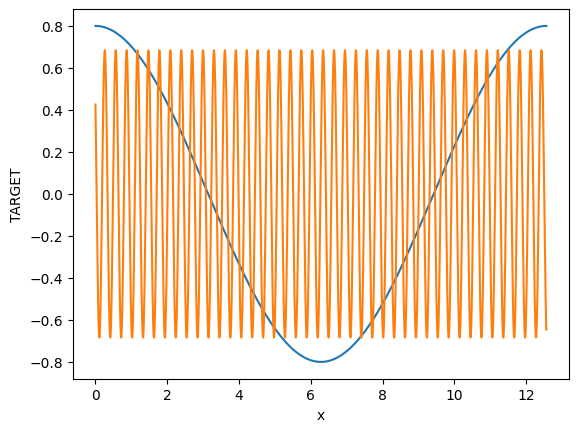

error:0.5470827992840742 period:20.025717485698596 amplitude:0.684477122813263 constant: 0.8991361806120329 
error:0.564413622404972 period:17.520948721361197 amplitude:0.6845062709336924 constant: 0.899094326675243 
error:0.5685862466311551 period:16.905945824858424 amplitude:0.6846765815890001 constant: 0.8993267136498513 
error:0.5442847154186993 period:16.46276378166303 amplitude:0.6846045983315013 constant: 0.8992531960937884 
error:0.5480335847436008 period:16.121328447913438 amplitude:0.6851266665595908 constant: 0.8991765855881791 
error:0.5700592232592403 period:17.882688191066542 amplitude:0.6854006934420629 constant: 0.8993615439882156 
error:0.5680076297598299 period:17.736598296092282 amplitude:0.6851142755719243 constant: 0.8994800280654964 
error:0.5752230214736179 period:17.813855239402855 amplitude:0.6854189154407738 constant: 0.8996879246306158 
error:0.5790643558152144 period:18.10567700521588 amplitude:0.6857062411113788 constant: 0.899711283657267 
error:0.54855847

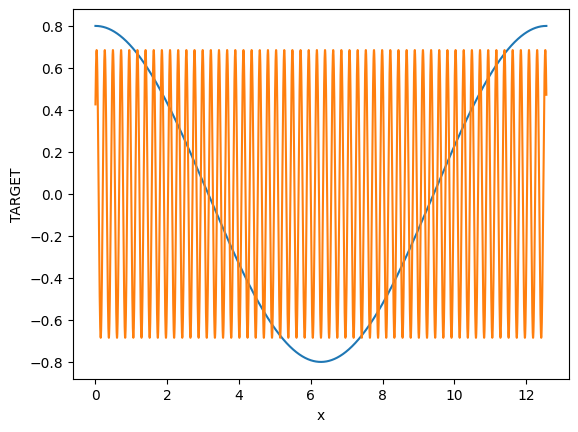

error:0.5583047219291579 period:-27.15858338176587 amplitude:0.685027253417792 constant: 0.8993562775157237 
error:0.5494505896989391 period:-28.11515941997689 amplitude:0.6849192458119516 constant: 0.8995660870161516 
error:0.5400394430076636 period:-27.55993016452679 amplitude:0.6847341680007664 constant: 0.8995660875421518 
error:0.5637523222490352 period:-26.664884053216003 amplitude:0.6848910323188169 constant: 0.8994318056496906 
error:0.5480836368987172 period:-26.10265660914047 amplitude:0.6847695255269115 constant: 0.8996006138597128 
error:0.5383126553622377 period:-24.993035362141523 amplitude:0.685021731942399 constant: 0.8994830434531146 
error:0.5403277943632009 period:-26.372607942448628 amplitude:0.6852156048767889 constant: 0.8996769757092485 
error:0.5573014054015516 period:-24.250555063793744 amplitude:0.6855067417034206 constant: 0.899540220094743 
error:0.5466975850924198 period:-24.979108439815292 amplitude:0.6856310453499657 constant: 0.8993416802302955 
error:0.

In [30]:
def y_predict(a,b,c,d,x):
    return a * math.cos(b*x + c) + d

lr = 0.00001
n = len(x)
batch = 2800
epochs = 2000

rsl = []
a = random.random()
b = random.random()
c = random.random()
d = 0
for i in range(epochs):
    a_gradiente = 0
    b_gradiente = 0
    c_gradiente = 0
    d_gradiente = 0
    e = 0

    if i == 10 or i == 400 or i == 1000 or i == 4000:
        data_yhat = []
        a_final = rsl[-1][0]
        b_final = rsl[-1][1]
        c_final = rsl[-1][2]
        for value in x:
            data_yhat.append(y_predict(a_final, b_final, c_final, d, value))
        plt.plot(x,y,label="Datos Originales")
        plt.plot(x, data_yhat, label="Datos a Predecir")
        plt.xlabel("x")
        plt.ylabel("TARGET")
        plt.show()
    for m in range(batch):
        ix = int(random.uniform(0,n))
        e +=  (y[ix] - y_predict(a,b,c,d,x[ix]))* (y[ix] - y_predict(a,b,c,d,x[ix]))
        a_gradiente += -2*e*math.cos(b*ix+c)
        b_gradiente += 2*e*a*math.sin(b*ix+c)*ix
        c_gradiente += 2*e*a*math.sin(b*ix*c)

    a = a - lr * a_gradiente/batch
    b = b - lr * b_gradiente/batch
    c = c - lr * c_gradiente/batch

    e = e/batch
    rsl.append([a,b,c,d,e])
    print(f"error:{e} period:{b} amplitude:{a} constant: {c} ")


In [ ]:
x_min = x.min().min()
long_s = [ y_predict(a,b,c,d,xi) for xi in np.arange(x_min , 20*math.pi, 0.001).astype(np.float32)]
long_s

In [8]:
sd.play(long_s)

In [14]:
sd.play(long_s,44100)
sd.wait()
wavio.write("./data/sound_prediccion.wav",long_s,44100,sampwidth=3)

In [16]:
data_test = pd.read_csv("./data/test.csv")
x_test = data_test['x']
data_predicts = []
for value in x_test:
    data_predicts.append(y_predict(a_final,b_final,c_final,d,value))

In [20]:
example_id = data_test['example_id']
df_sound = pd.DataFrame(data= zip(example_id, data_predicts),
                      columns=["example_id","TARGET"])
df_sound.to_csv("./data/prediction_sound_best2.csv", index=False)